In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2,style='darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#change display into using full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
#import .csv file
data = pd.read_csv(r'E:\Python Codes & Insights Sheet\Codes\02. Facebook Data Analysis\01. Targeting\1. FB_data_targeting.csv')

# 1. Data Exploration & Cleaning

### 1. Have a first look at data

In [5]:
data.head()

,Campaign name,Ad set name,Ad name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Reporting starts,Reporting ends
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3.202158,90.565411,40360,578,2019-11-01,2019-12-03
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2.749115,111.021155,34177,681,2019-11-01,2019-12-03
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2.522201,119.670478,26584,752,2019-11-01,2019-12-03
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2.206720,118.493523,24627,471,2019-11-01,2019-12-03
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2.666667,108.229167,21024,603,2019-11-01,2019-12-03


In [6]:
data.shape

(31, 15)

### 2. Drop Columns that are extra

In [7]:
#We see that Reporting Starts and Reporting Ends are additional columns which we don't require. So we drop them
data.drop(['Reporting ends','Reporting starts'],axis=1, inplace = True)

In [8]:
#look at the data again
data.head()

,Campaign name,Ad set name,Ad name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all)
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3.202158,90.565411,40360,578
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2.749115,111.021155,34177,681
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2.522201,119.670478,26584,752
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2.206720,118.493523,24627,471
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2.666667,108.229167,21024,603


In [9]:
#check rows and columns in data
data.shape

(31, 13)

### 3. Deal with Null Values

In [10]:
#let's look if any column has null values
data.isnull().sum()

Campaign name                       0
Ad set name                         0
Ad name                             0
Result Type                         0
Results                             4
CTR (all)                           0
Result rate                         4
Amount spent (INR)                  0
Cost per result                     4
Frequency                           0
CPM (cost per 1,000 impressions)    0
Impressions                         0
Clicks (all)                        0
dtype: int64

#### From this we can infer that some columns have Null values (basically blank). Let's look at them:
**1. Results:** This happened when there was no conversion (Result).

**2. Result rate, Cost per result:** As both these metrics depend on Result, so these are also blank. 

This was bound to happen because not every single day and every ad got a result (conversion). **So it is safe to replace all nulls in Results and Result rate column with 0.**

In [11]:
#Fill all blanks in Results with 0
data['Results'] = data['Results'].fillna(0)
data['Result rate'] = data['Result rate'].fillna(0)

In [12]:
#check how many nulls are still there 
data.isnull().sum()

Campaign name                       0
Ad set name                         0
Ad name                             0
Result Type                         0
Results                             0
CTR (all)                           0
Result rate                         0
Amount spent (INR)                  0
Cost per result                     4
Frequency                           0
CPM (cost per 1,000 impressions)    0
Impressions                         0
Clicks (all)                        0
dtype: int64

Now we need to deal with **Cost per result**.
The cases where CPA is Null means that there was no conversion. So ideally, in these cases the CPA should be very high (in case a conversion actually happened).

#### So, let's leave this column as it is because we can't assign any value for records where no conversion happened.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Campaign name                     31 non-null     object 
 1   Ad set name                       31 non-null     object 
 2   Ad name                           31 non-null     object 
 3   Result Type                       31 non-null     object 
 4   Results                           31 non-null     float64
 5   CTR (all)                         31 non-null     float64
 6   Result rate                       31 non-null     float64
 7   Amount spent (INR)                31 non-null     float64
 8   Cost per result                   27 non-null     float64
 9   Frequency                         31 non-null     float64
 10  CPM (cost per 1,000 impressions)  31 non-null     float64
 11  Impressions                       31 non-null     int64  
 12  Clicks (al

# 2. Feature Engineering

Make new and better features from using the current available features

### 1. Make Cost per Click column

In [14]:
data['CPC'] = data['Amount spent (INR)']/data['Clicks (all)']

In [15]:
data.head()

,Campaign name,Ad set name,Ad name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),CPC
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3.202158,90.565411,40360,578,6.323910
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2.749115,111.021155,34177,681,5.571762
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2.522201,119.670478,26584,752,4.230479
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2.206720,118.493523,24627,471,6.195626
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2.666667,108.229167,21024,603,3.773483


### 2. We can divide Frequency in buckets

In [16]:
data['Frequency'] = data['Frequency'].apply(lambda x:'1 to 2' if x<2
                                               else '2 to 3' if x>=2 and x<3 
                                               else '3 to 4' if x>=3 and x<4
                                               else '4 to 5' if x>=4 and x<5
                                               else 'More than 5')

In [17]:
data.head()

,Campaign name,Ad set name,Ad name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),CPC
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3 to 4,90.565411,40360,578,6.323910
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2 to 3,111.021155,34177,681,5.571762
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2 to 3,119.670478,26584,752,4.230479
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2 to 3,118.493523,24627,471,6.195626
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2 to 3,108.229167,21024,603,3.773483


### 3. Split Ad name into Ad Format and Ad Headline

In [18]:
data['Ad_name'] = data['Ad name']

In [19]:
data.head()

,Campaign name,Ad set name,Ad name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),CPC,Ad_name
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3 to 4,90.565411,40360,578,6.323910,Image-Partner with us today!
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2 to 3,111.021155,34177,681,5.571762,Image-Minimum Investment & Maximum Profit
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2 to 3,119.670478,26584,752,4.230479,Image-Minimum Investment & Maximum Profit
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2 to 3,118.493523,24627,471,6.195626,Image-Minimum Investment & Maximum Profit
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2 to 3,108.229167,21024,603,3.773483,Image-Minimum Investment & Maximum Profit


In [20]:
data[['Ad Format','Ad Headline']] = data.Ad_name.str.split("-",expand=True)

In [21]:
data.head()

,Campaign name,Ad set name,Ad name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),CPC,Ad_name,Ad Format,Ad Headline
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3 to 4,90.565411,40360,578,6.323910,Image-Partner with us today!,Image,Partner with us today!
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2 to 3,111.021155,34177,681,5.571762,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2 to 3,119.670478,26584,752,4.230479,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2 to 3,118.493523,24627,471,6.195626,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2 to 3,108.229167,21024,603,3.773483,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit


In [22]:
data.drop(['Ad name','Ad_name'],axis=1, inplace = True)

In [23]:
data.head()

,Campaign name,Ad set name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),CPC,Ad Format,Ad Headline
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3 to 4,90.565411,40360,578,6.323910,Image,Partner with us today!
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2 to 3,111.021155,34177,681,5.571762,Image,Minimum Investment & Maximum Profit
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2 to 3,119.670478,26584,752,4.230479,Image,Minimum Investment & Maximum Profit
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2 to 3,118.493523,24627,471,6.195626,Image,Minimum Investment & Maximum Profit
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2 to 3,108.229167,21024,603,3.773483,Image,Minimum Investment & Maximum Profit


In [24]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Campaign name                     31 non-null     object 
 1   Ad set name                       31 non-null     object 
 2   Result Type                       31 non-null     object 
 3   Results                           31 non-null     float64
 4   CTR (all)                         31 non-null     float64
 5   Result rate                       31 non-null     float64
 6   Amount spent (INR)                31 non-null     float64
 7   Cost per result                   27 non-null     float64
 8   Frequency                         31 non-null     object 
 9   CPM (cost per 1,000 impressions)  31 non-null     float64
 10  Impressions                       31 non-null     int64  
 11  Clicks (all)                      31 non-null     int64  
 12  CPC       

In [25]:
data.to_csv('4. Clean_Data_Targeting.csv')

## Now our data is clean. Here are our features that we will use for analysis

- **1. Campaign Name** - Name of campaign
- **2. Ad Set Name** - Targeting
- **3. Result Type** - What type of conversion happened: page like, post enagement, in-facebook lead, store visit or custom conversion.
- **4. Results** - How many conversions were achieved
- **5. CTR** - Click Through Rate
- **6. Result Rate** - Conversion Rate
- **7. Amount spent** - How much money was spent on ad campaign
- **8. Cost per result** - Average Cost required for 1 conversion
- **9. Frequency** - On an average how many times did one user see the ad
- **10. CPM** - Cost per 1000 impressions
- **11. Convert Status** - Whether a conversion happened or not
- **12. Ad Format** - Whether the ad crative is **Image/Video/Carousel**
- **13. Ad Headline** - The headline used in ad

The variables having object written in front of them are categorical columns. While the rest are numerical.

# 3. Relationship Visualization

## 1. Effect of Targeting + Ad Headline + Budget on Engagement & Conversion

In [26]:
data['Ad set name'].value_counts()

Remarketing         16
IT Professionals     5
Business Owners      5
Housewives           5
Name: Ad set name, dtype: int64

In [27]:
data['Ad Headline'].value_counts()

No. 1 Franchise Opportunity                9
Minimum Investment & Maximum Profit        7
60+ Franchise Stores across Maharashtra    7
Own a Chicken Store Today                  6
Partner with us today!                     2
Name: Ad Headline, dtype: int64

### Generic View

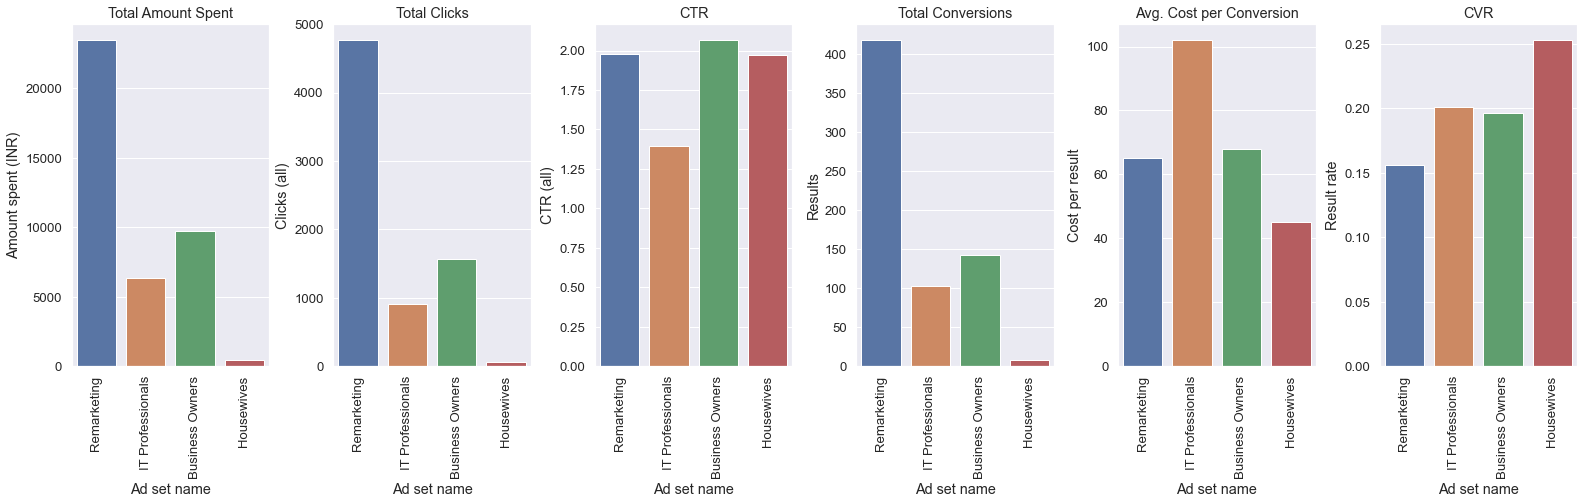

In [28]:
# increase figure size 
plt.figure(figsize=(22, 7))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x='Ad set name', y='Amount spent (INR)', data=data, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x='Ad set name', y='Clicks (all)', data=data, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x='Ad set name', y='CTR (all)', data=data, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x='Ad set name', y='Results', data=data, estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)

# subplot 5
plt.subplot(1, 6, 5)

sns.barplot(x='Ad set name', y='Cost per result', data=data, estimator=np.mean,ci=None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x='Ad set name', y='Result rate', data=data, estimator=np.mean,ci=None)
plt.title("CVR")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()

### Let's Look at a Granular View

Text(0.5, 0.98, 'Avg. Conversion Rate of Each Ad')

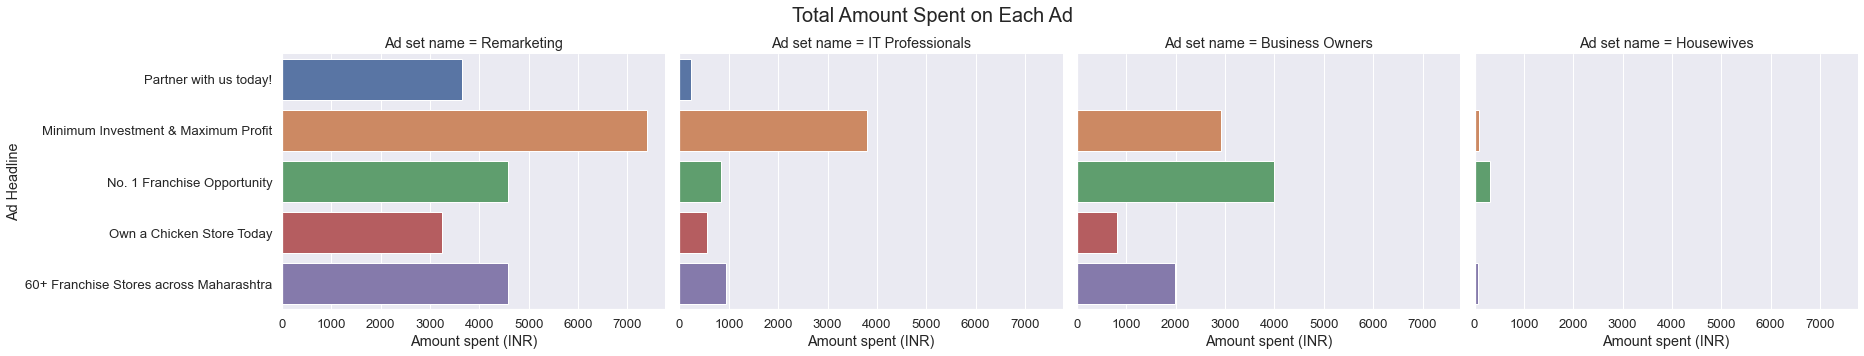

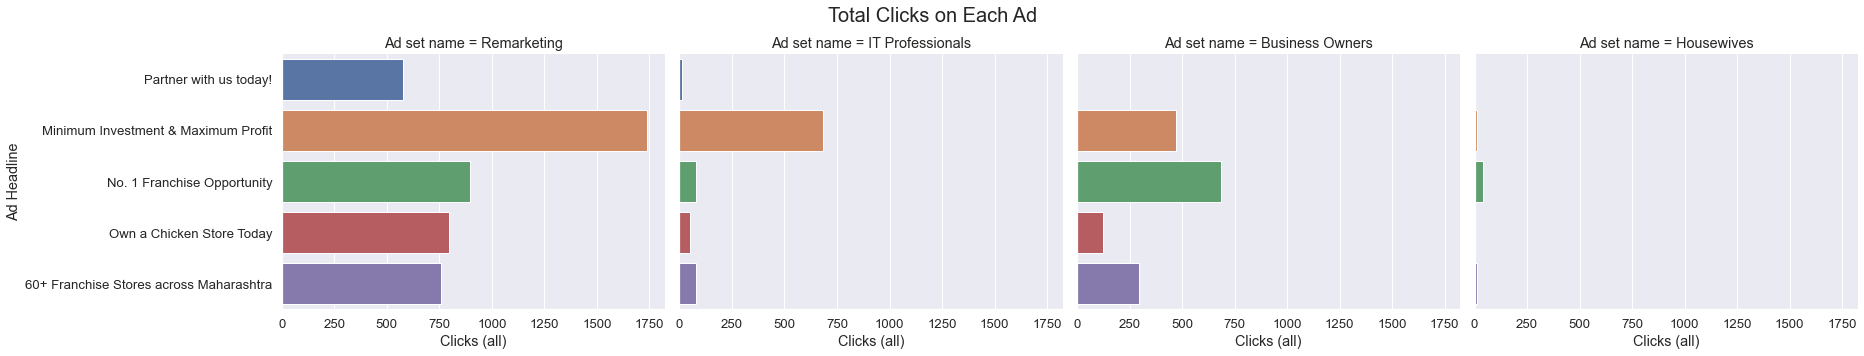

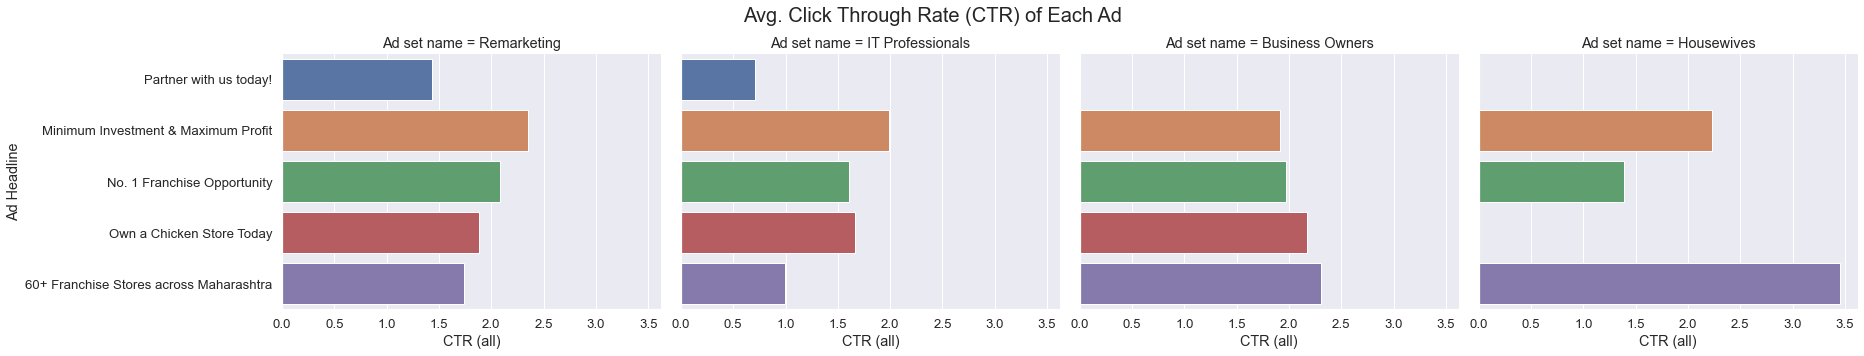

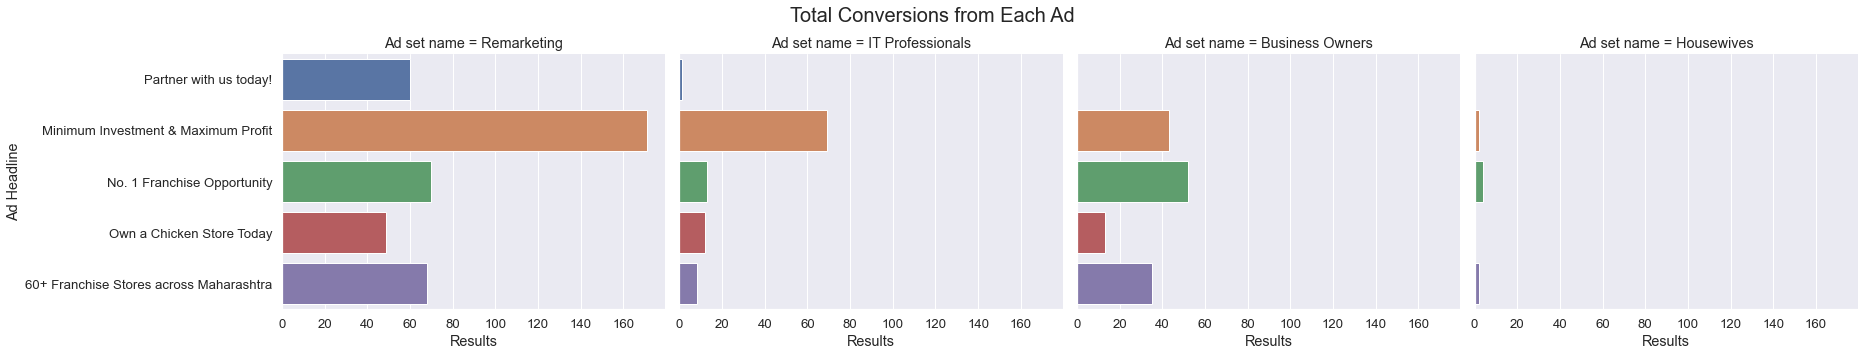

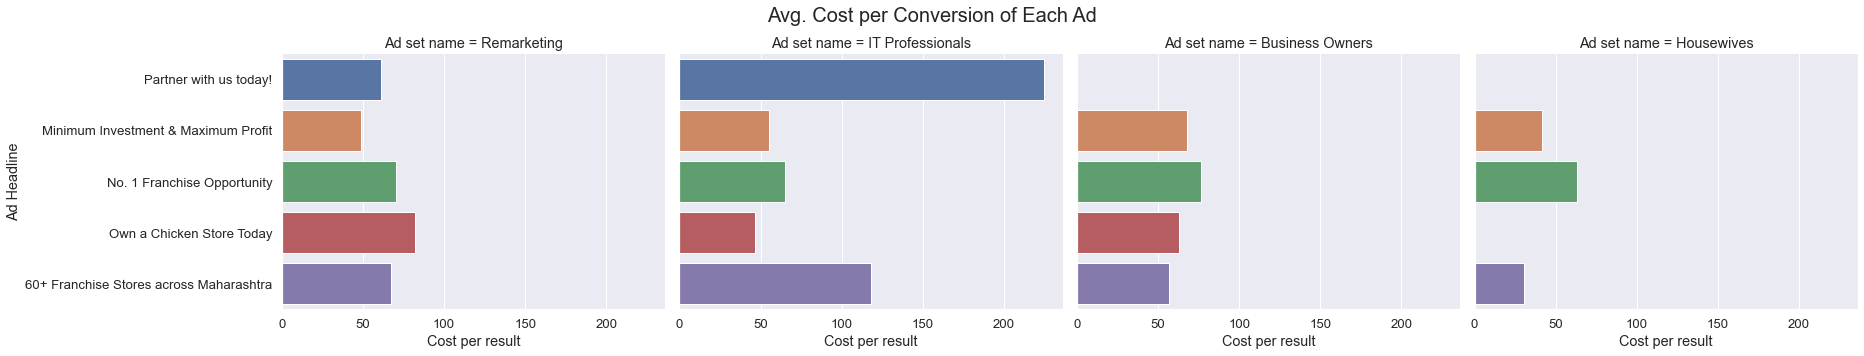

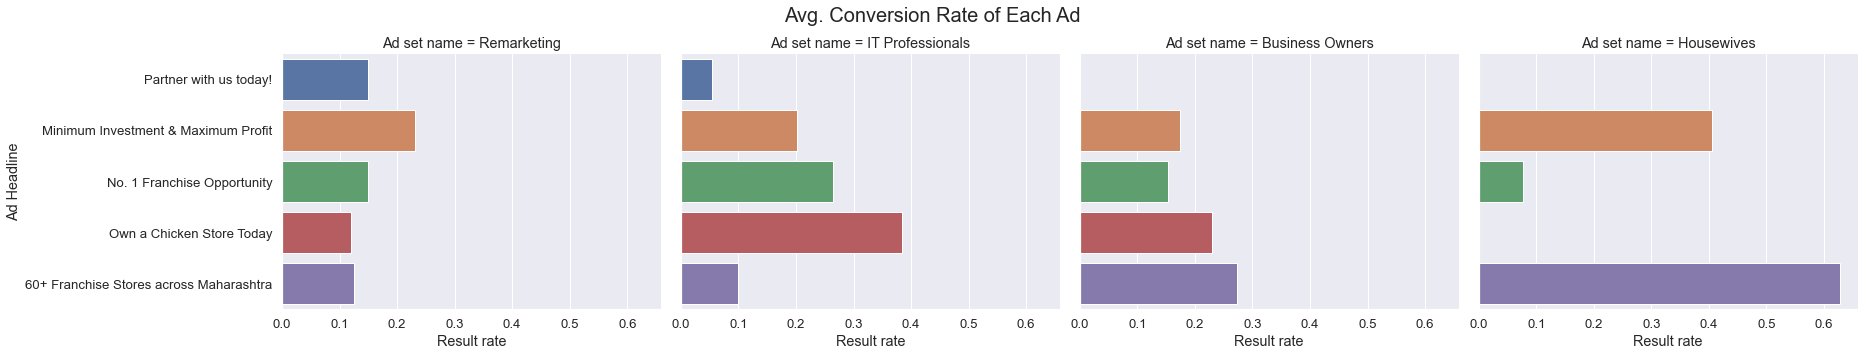

In [29]:
sns.catplot(y='Ad Headline',x='Amount spent (INR)',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Amount Spent on Each Ad',fontsize=20)

sns.catplot(y='Ad Headline',x='Clicks (all)',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Clicks on Each Ad',fontsize=20)

sns.catplot(y='Ad Headline',x='CTR (all)',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Ad',fontsize=20)

sns.catplot(y='Ad Headline',x='Results',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Conversions from Each Ad',fontsize=20)

sns.catplot(y='Ad Headline',x='Cost per result',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Cost per Conversion of Each Ad',fontsize=20)

sns.catplot(y='Ad Headline',x='Result rate',col='Ad set name',data=data,kind='bar',aspect=1.3, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Conversion Rate of Each Ad',fontsize=20)

## 2. Effect of Targeting + Ad Format + Budget on Engagement & Conversion

### Generic View

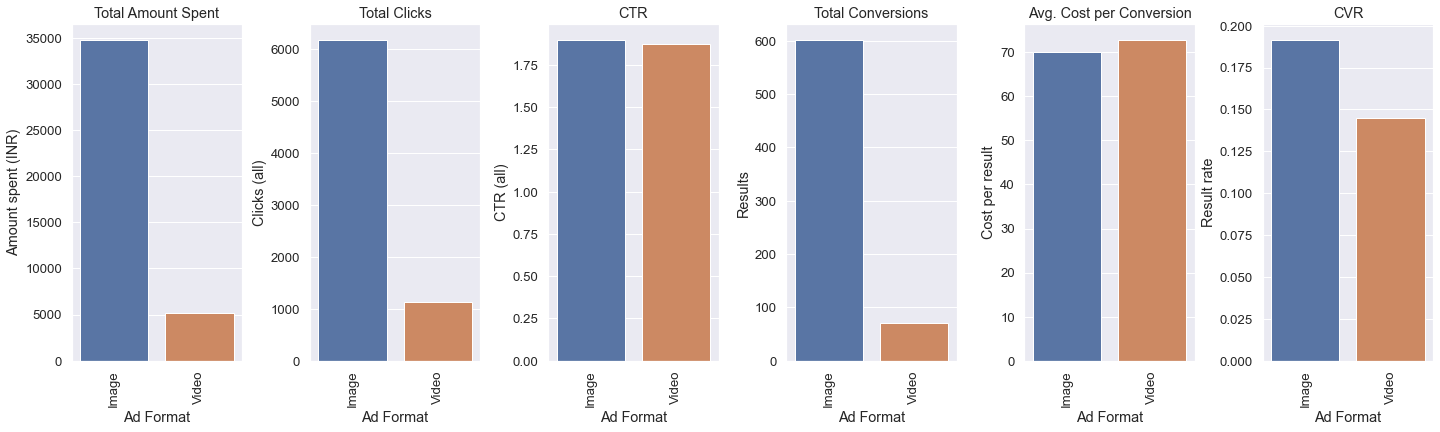

In [30]:
# increase figure size 
plt.figure(figsize=(20, 6))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x='Ad Format', y='Amount spent (INR)', data=data, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x='Ad Format', y='Clicks (all)', data=data, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x='Ad Format', y='CTR (all)', data=data, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x='Ad Format', y='Results', data=data, estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)


# subplot 5
plt.subplot(1, 6, 5)
sns.barplot(x='Ad Format', y='Cost per result', data=data, estimator=np.mean,ci=None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x='Ad Format', y='Result rate', data=data, estimator=np.mean,ci=None)
plt.title("CVR")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()

Text(0.5, 0.98, 'Avg. Conversion Rate of Each Ad Format')

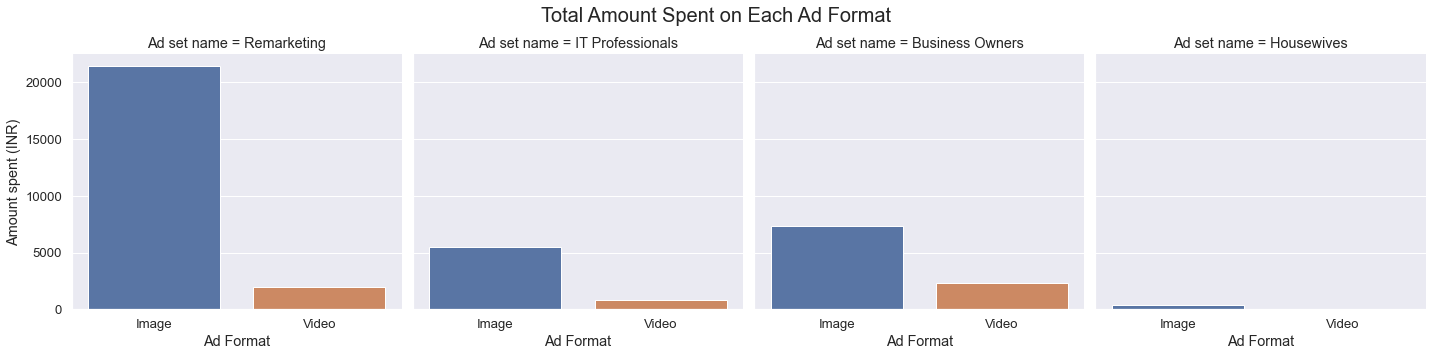

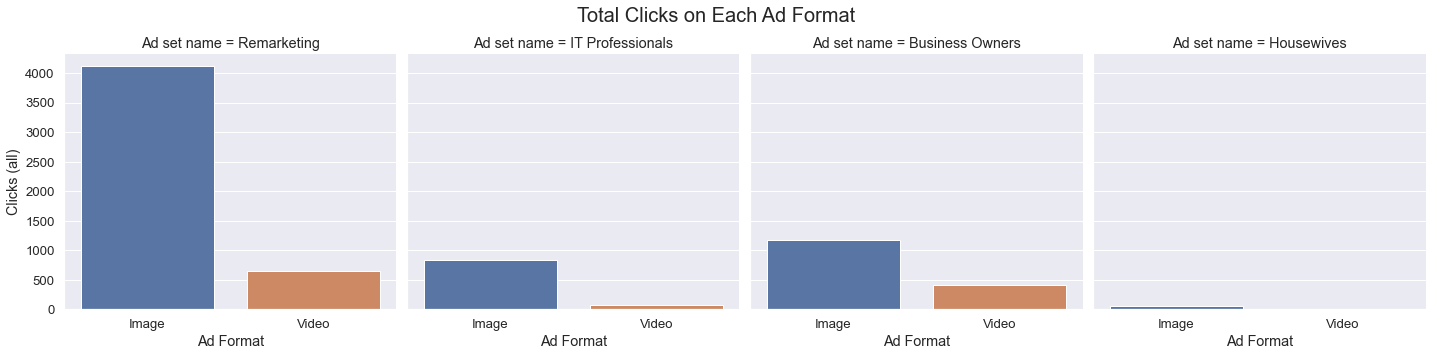

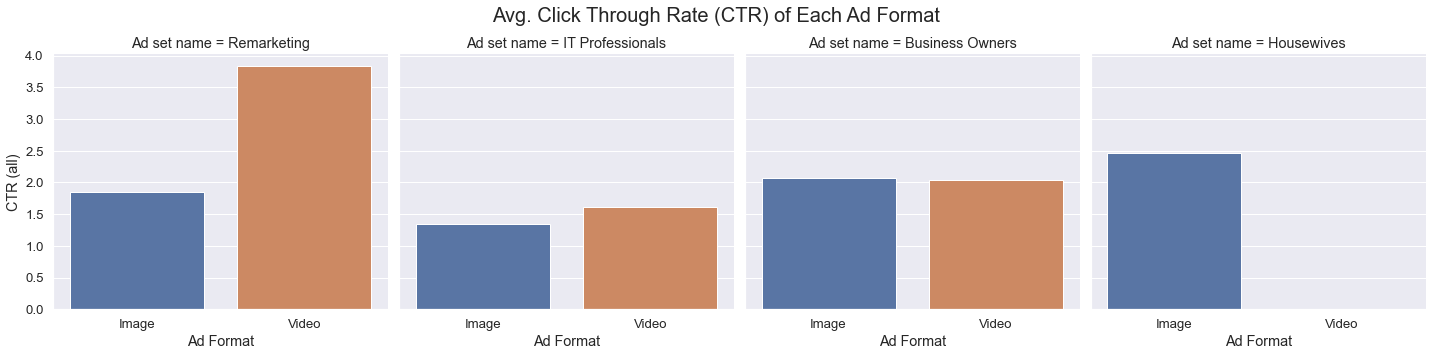

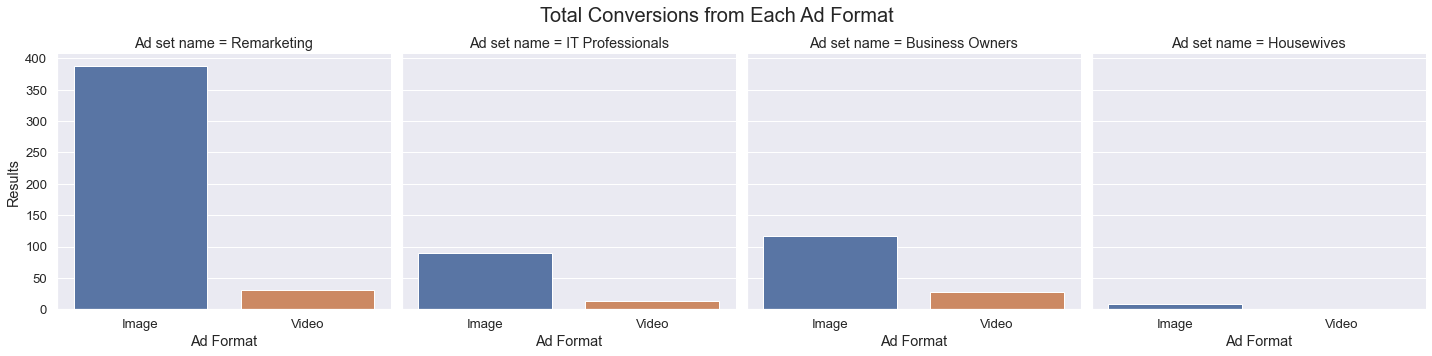

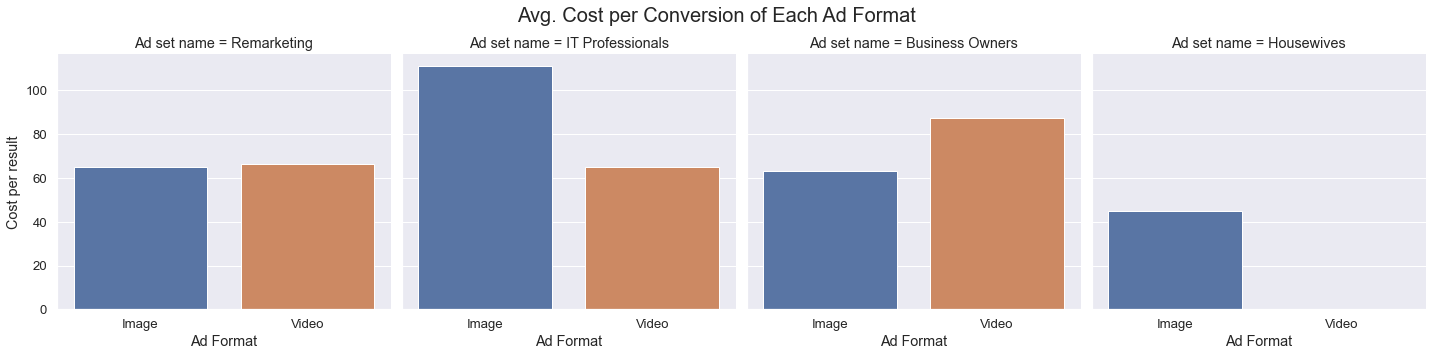

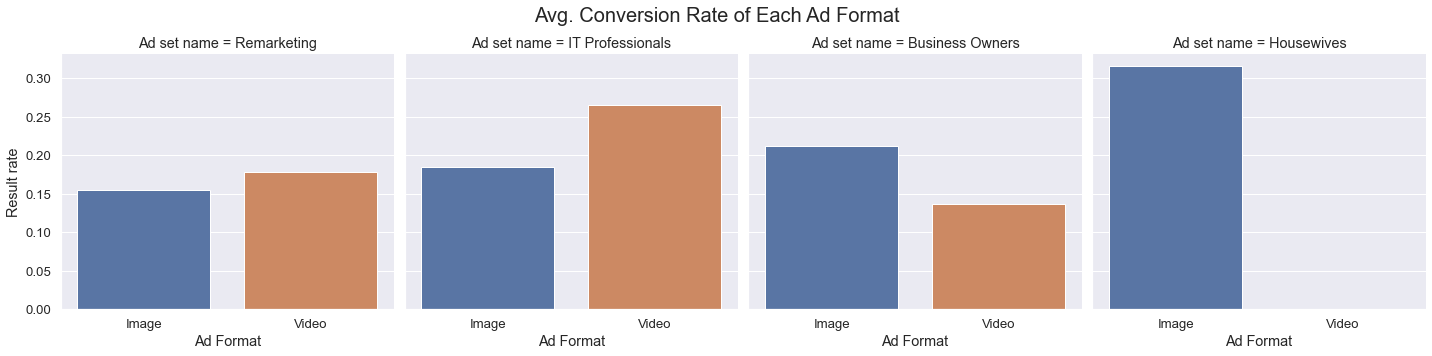

In [31]:
sns.catplot(x='Ad Format',y='Amount spent (INR)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Amount Spent on Each Ad Format',fontsize=20)

sns.catplot(x='Ad Format',y='Clicks (all)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Clicks on Each Ad Format',fontsize=20)

sns.catplot(x='Ad Format',y='CTR (all)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Ad Format',fontsize=20)

sns.catplot(x='Ad Format',y='Results',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Conversions from Each Ad Format',fontsize=20)

sns.catplot(x='Ad Format',y='Cost per result',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Cost per Conversion of Each Ad Format',fontsize=20)

sns.catplot(x='Ad Format',y='Result rate',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Conversion Rate of Each Ad Format',fontsize=20)

## 3. Effect of Targeting + Frequency + Budget on Engagement & Conversion

In [32]:
data = data.sort_values(by=['Frequency']) 

### Generic View

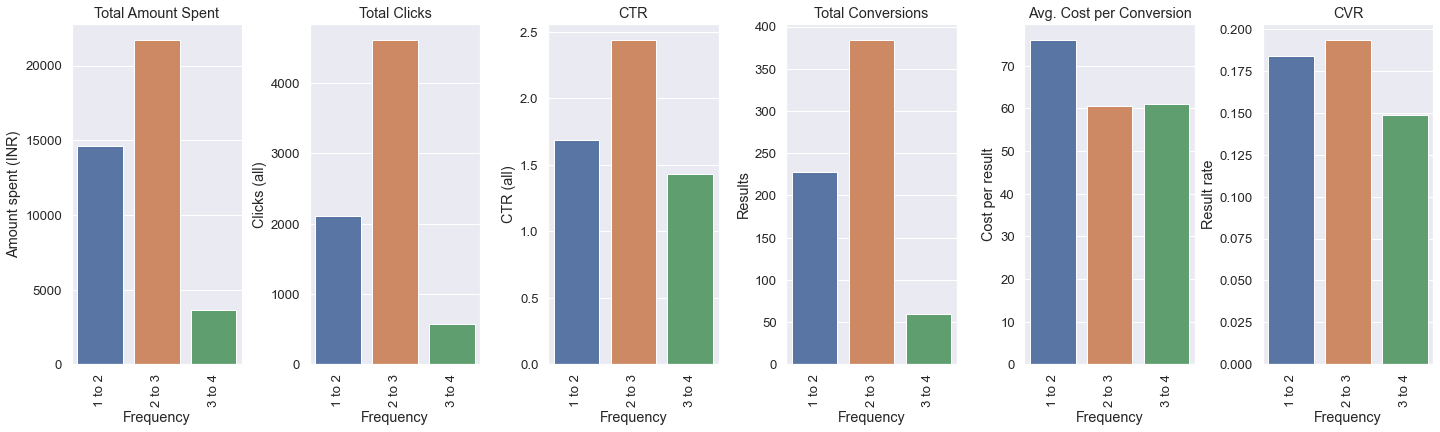

In [33]:
# increase figure size 
plt.figure(figsize=(20, 6))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x='Frequency', y='Amount spent (INR)', data=data, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x='Frequency', y='Clicks (all)', data=data, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x='Frequency', y='CTR (all)', data=data, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x='Frequency', y='Results', data=data, estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)

# subplot 5
plt.subplot(1, 6, 5)
sns.barplot(x='Frequency', y='Cost per result', data=data, estimator=np.mean,ci=None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x='Frequency', y='Result rate', data=data, estimator=np.mean,ci=None)
plt.title("CVR")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()

### Granular View

Text(0.5, 0.98, 'Avg. Conversion Rate of Each Frequency')

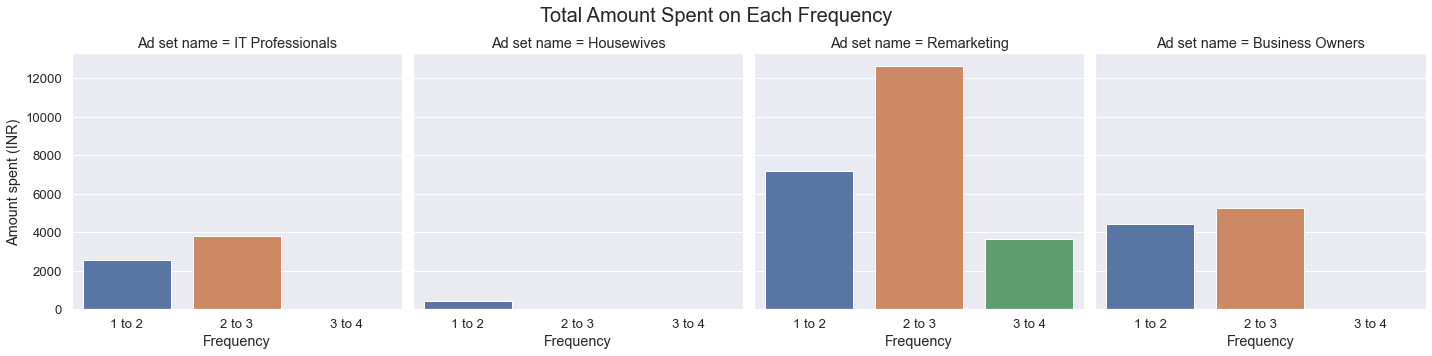

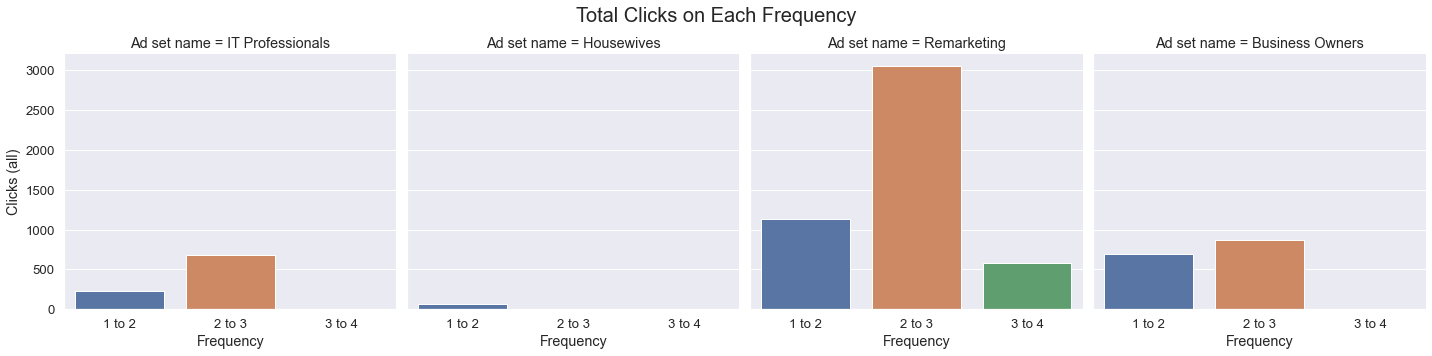

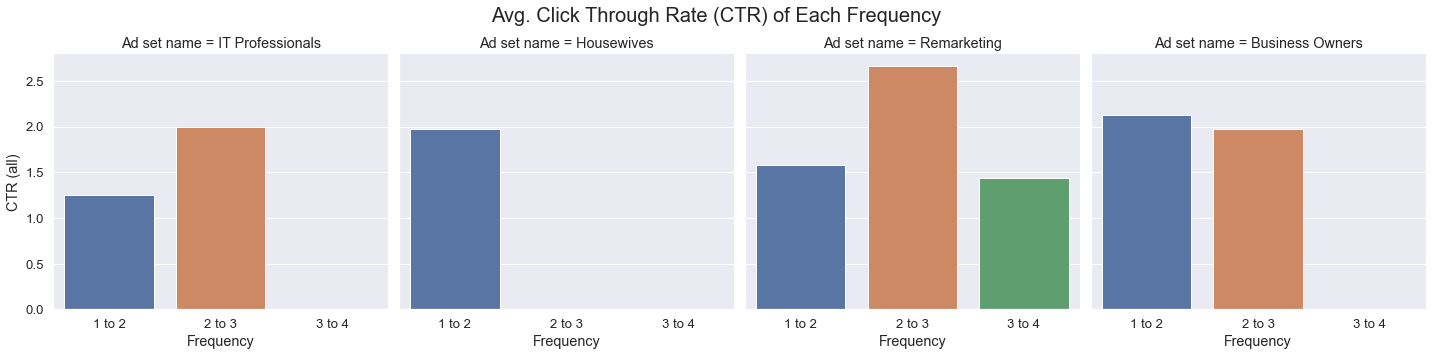

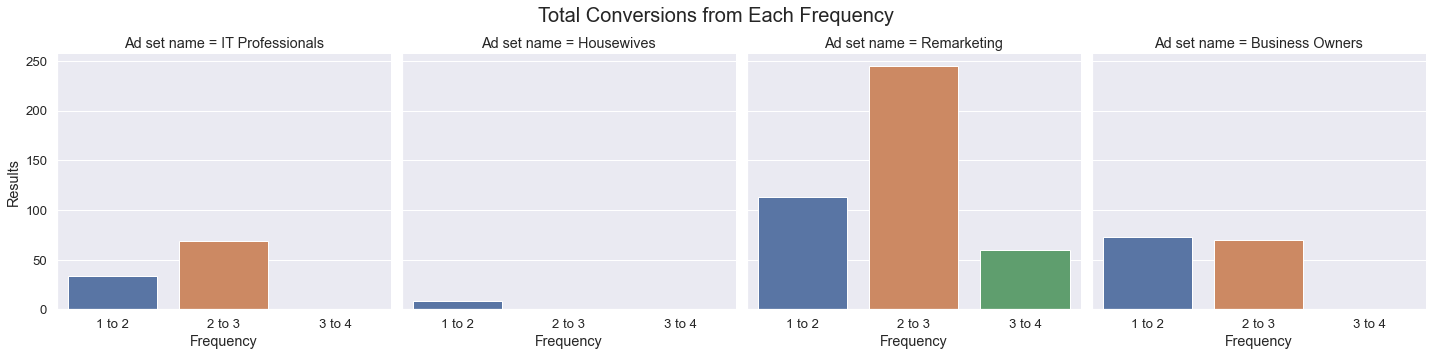

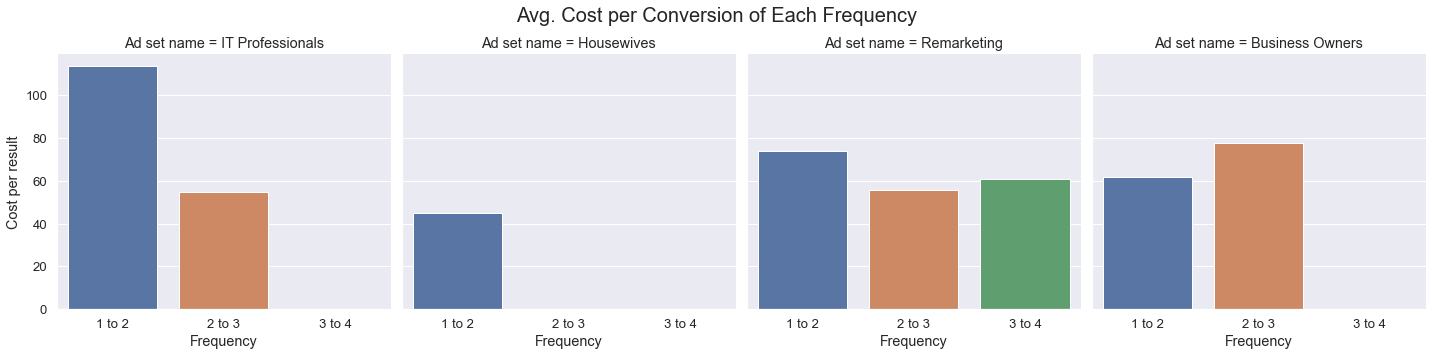

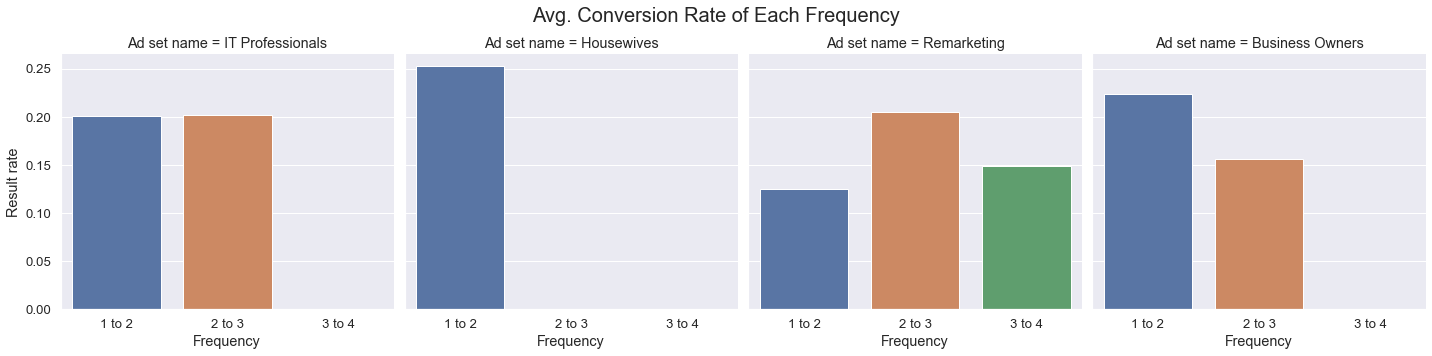

In [34]:
sns.catplot(x='Frequency',y='Amount spent (INR)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Amount Spent on Each Frequency',fontsize=20)

sns.catplot(x='Frequency',y='Clicks (all)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Clicks on Each Frequency',fontsize=20)

sns.catplot(x='Frequency',y='CTR (all)',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Frequency',fontsize=20)

sns.catplot(x='Frequency',y='Results',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Conversions from Each Frequency',fontsize=20)

sns.catplot(x='Frequency',y='Cost per result',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Cost per Conversion of Each Frequency',fontsize=20)

sns.catplot(x='Frequency',y='Result rate',col='Ad set name',data=data,kind='bar',aspect=1, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Conversion Rate of Each Frequency',fontsize=20)